<a href="https://colab.research.google.com/github/kacp-i/BCU-Work/blob/main/Y2%20S1%20CMP-5367%20Artificial%20Intelligence%20and%20Machine%20Learning/Assesment/AI_dataset_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style('whitegrid')


#Importing the dataset

In [ ]:
ds = pd.read_csv('spotify.csv')

#Exploring the dataset

In [ ]:
ds.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Describing the columns:

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) performing the song
- artist_count: Number of artists contributing to the song
- released_year, released_month, released_day: Release date details
- in_spotify_playlists: Number of Spotify playlists the song is featured in
- in_spotify_charts: Rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists, in_apple_charts: Presence in Apple Music playlists and charts
- in_deezer_playlists, in_deezer_charts: Presence in Deezer playlists and charts
- in_shazam_charts: Rank on Shazam charts
- bpm: Beats per minute, representing the tempo of the song
- key: Key of the song
- mode: Indicates whether the song is in a major or minor mode
- danceability_%: Suitability of the song for dancing
- valence_%: Positivity of the song’s musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Acoustic sound presence in the song
- instrumentalness_%: Proportion of instrumental content in the track
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Dataset taken from:
https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs/data

#Abstracting data

In [ ]:
ds.drop('cover_url', axis=1)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#Data Visualisation

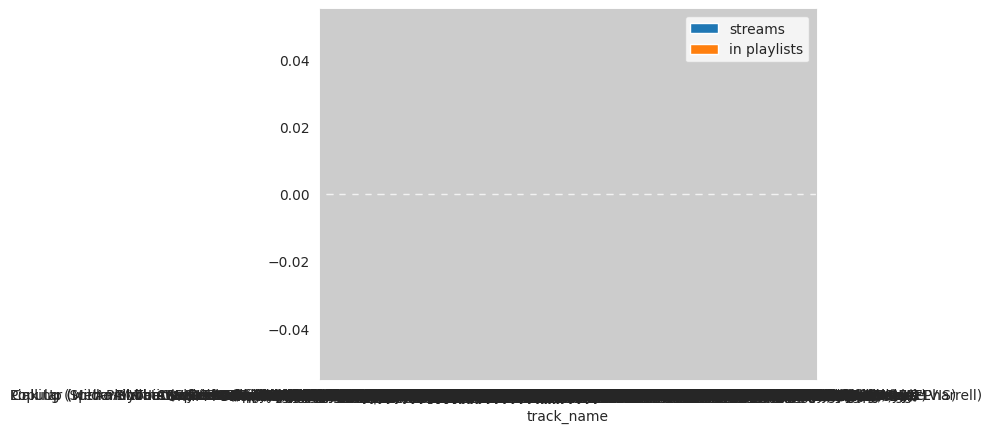

In [ ]:
aaaa = pd.DataFrame({'streams':ds['streams'], 'in playlists':ds['in_spotify_playlists']}, index=ds['track_name'])
aaa = aaaa.plot.bar(rot=0)